###reference

various optimizers: https://ganghee-lee.tistory.com/24

various gradient descent methods: https://twinw.tistory.com/247

gradient in python: https://blog.naver.com/PostView.naver?blogId=ssdyka&logNo=221300959357&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView

derivative and gradient of metrices and scalar: https://darkpgmr.tistory.com/141

머신러닝 딥러닝에 필요한 기초수학 with 파이썬 (저자: 조준우)

###derivative

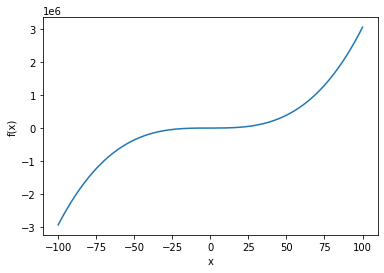

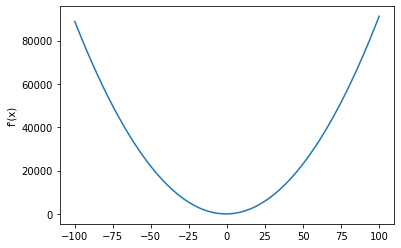

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(start=-100, stop=100, num=1000)
def f(x):
    return 3 * (x ** 3) + 6 * (x ** 2) - 2 * x + 1
def derivative(f, x):
    h = 0.00001
    return (f(x + h) - f(x)) / h

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, f(x))
plt.show()

plt.ylabel("f'(x)")
plt.plot(x, derivative(f, x))
plt.show()

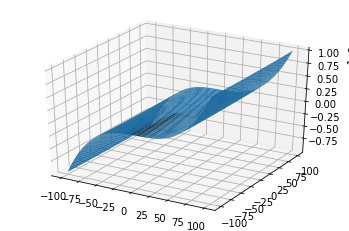

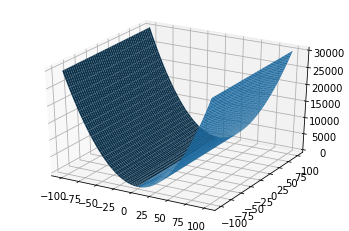

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-100, 100, 2000)
y = np.linspace(-100, 100, 2000)

xx, yy = np.meshgrid(x, y)

def f(x, y):
    temp = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            temp[i, j] = x[i] ** 2 + y[j] ** 3
    return temp
plt.figure(1)
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx, yy, f(x, y))
plt.show()
def derivative(f, x, y):
    h = 0.00001
    return (f(x + h, y + h) - f(x, y)) / h

plt.figure(2)
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx, yy, derivative(f, x, y))
plt.show()

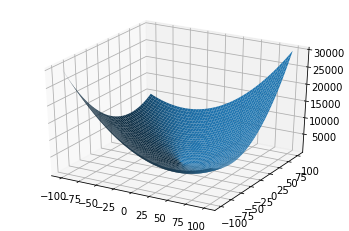

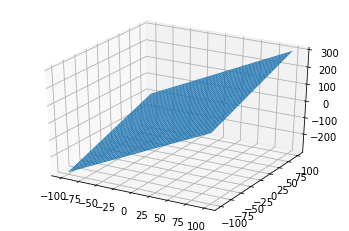

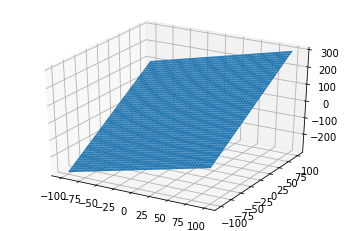

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-100, 100, 2000)
y = np.linspace(-100, 100, 2000)

def f(x, y):
    xx, yy = np.meshgrid(x, y)
    return xx ** 2 + np.multiply(xx, yy) + yy ** 2

xx, yy = np.meshgrid(x, y)
plt.figure(1)
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx, yy, f(x, y))
plt.show()

def dx(f, x, y):
    h = 0.0001
    return (f(x + h, y) - f(x, y)) / h
def dy(f, x, y):
    h = 0.0001
    return (f(x, y + h) - f(x, y)) / h

xx, yy = np.meshgrid(x, y)
plt.figure(2)
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx, yy, dx(f, x, y))
plt.show()

xx, yy = np.meshgrid(x, y)
plt.figure(3)
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx, yy, dy(f, x, y))
plt.show()

#Numerical Differential

##Linear Regression

In [ ]:
import numpy as np
x = np.array([[1, 2, 3, 4, 5]]) #shape: (1, 5) (n0, m)
weight = np.random.rand(1, 1) #shape: (n1, n0)
bias = np.random.rand(1, 1) #shape: (n1, 1)
y = np.array([126 * i + 1 for i in x]) #shape: (1, 5) (n1, m)

def linear(x, w, b):
    return np.matmul(w, x) + b

def cost(x, w, b, y):
    return np.average((y - linear(x, w, b)) ** 2)

def J(x, w, b, y):
    return (y - linear(x, w, b)) ** 2

def h_matrix(n, m, i, j, h):
    h_mat = np.zeros((n, m))
    h_mat[i][j] += h
    return h_mat

def gradient(x, w, b, y):
    h = 0.00001
    dw = np.zeros((len(w), len(w[0])))
    db = np.zeros((len(b), len(b[0])))
    for i in range(len(w)):
        for j in range(len(w[0])):
            dw[i][j] = np.average((J(x, w + h_matrix(len(w), len(w[0]), i, j, h), b, y) - J(x, w, b, y)) / h)

    for i in range(len(b)):
        for j in range(len(b[0])):
            db[i][j] = np.average((J(x, w, b + h_matrix(len(b), len(b[0]), i, j, h), y) - J(x, w, b, y)) / h)

    return dw, db

def gradient_(x, w, b, y):
    h = 0.00001
    dw = np.average((J(x, w + h, b, y) - J(x, w, b, y)) / h)
    db = np.average((J(x, w, b + h, y) - J(x, w, b, y)) / h)
    return dw, db

def gradient_descent(x, weight, bias, y):
    EPOCHS = 10000
    learning_rate = 0.01
    for iter in range(EPOCHS + 1):
        dw, db = gradient(x, weight, bias, y)
        dw_, db_ = gradient_(x, weight, bias, y)
        weight = weight - learning_rate * dw
        bias = bias - learning_rate * db
        different_w = (dw - dw_).sum()
        different_b = (db - db_).sum()

        error = cost(x, weight, bias, y)
        if iter % (EPOCHS / 10) == 0:
            print("iter:", iter, "error:", error, "different_w:", different_w, "different_b:", different_b)

def gradient_descent_(x, weight, bias, y):
    EPOCHS = 10000
    learning_rate = 0.01
    for iter in range(EPOCHS + 1):
        dw, db = gradient_(x, weight, bias, y)
        weight = weight - learning_rate * dw
        bias = bias - learning_rate * db

        error = cost(x, weight, bias, y)
        if iter % (EPOCHS / 10) == 0:
            print("iter:", iter, "error:", error, "hypo:", linear(x, weight, bias))

gradient_descent(x, weight, bias, y)
gradient_descent_(x, weight, bias, y)

iter: 0 error: 100388.61158772584 different_w: 0.0 different_b: 0.0
iter: 1000 error: 0.21140064997162972 different_w: 0.0 different_b: 0.0
iter: 2000 error: 0.00024252606965449304 different_w: 0.0 different_b: 0.0
iter: 3000 error: 3.026068847463984e-07 different_w: 0.0 different_b: 0.0
iter: 4000 error: 1.9946058278792978e-09 different_w: 0.0 different_b: 0.0
iter: 5000 error: 8.542200996865193e-10 different_w: 0.0 different_b: 0.0
iter: 6000 error: 8.259764120747844e-10 different_w: 0.0 different_b: 0.0
iter: 7000 error: 8.250330105388994e-10 different_w: 0.0 different_b: 0.0
iter: 8000 error: 8.250011184922163e-10 different_w: 0.0 different_b: 0.0
iter: 9000 error: 8.250000444352744e-10 different_w: 0.0 different_b: 0.0
iter: 10000 error: 8.250000195946996e-10 different_w: 0.0 different_b: 0.0
iter: 0 error: 100388.61158772584 hypo: [[ 36.78061217  65.26362148  93.7466308  122.22964011 150.71264942]]
iter: 1000 error: 0.21140064997162972 hypo: [[127.77918641 253.48067725 379.182168

In [ ]:
import numpy as np
x = np.array([[1, 2, 3], [4, 5, 6]]) # shape: (2, 3)
w = np.array([[1 ,2], [3, 4], [5, 6]]) #shape: (3, 2)
y = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])
def J(x, w, y):
    return (np.matmul(w, x) - y) ** 2
def cost(x, w, y):
    return np.average((np.matmul(w, x) - y) ** 2)
def gradient(x, w, y): #이 방법은 dw와 weight의 shape이 맞지않으므로 gradient_의 방법이 맞음
    h = 0.01
    dw = (J(x, w + h, y) - J(x, w, y)) / h
    return dw
def gradient_(x, w, y):
    h = 0.01
    h_mat = np.zeros((3, 2))
    dw = np.zeros((3, 2))
    for i in range(3):
        for j in range(2):
            h_mat[i][j] += h
            ww = w + h_mat
            dw[i][j] = (cost(x, ww, y) - cost(x, w, y)) / h
            h_mat[i][j] -= h
    return dw

##Logistic Regression

In [ ]:
# MNIST - Convert into a binary classification problem by just classifying '2' or not
import numpy as np
import tensorflow as tf

(images_train, labels_train), (images_test, labels_test) = tf.keras.datasets.mnist.load_data()
images_train = np.reshape(images_train / 255.0 / 10, (len(images_train), len(images_train[0]) * len(images_train[0][0]))).T
images_test = np.reshape(images_test / 255.0 / 10, (len(images_test), len(images_test[0]) * len(images_test[0][0]))).T

def convert_to_binary(data):
    converted = np.zeros(len(data))
    for idx in range(len(data)):
        if data[idx] == 2:
            converted[idx] = 1
    return converted

labels_train, labels_test = convert_to_binary(labels_train), convert_to_binary(labels_test)

class LogisticRegression():
    def __init__(self, n):
        self.weights = np.random.rand(n)
        self.bias = np.random.rand(1)
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def hypothesis(self, features):
        linear_hypo = np.matmul(self.weights, features) + self.bias
        return self.sigmoid(linear_hypo)
    def cost(self, hypo, labels):
        loss = np.multiply(labels, np.log(hypo)) + np.multiply(1 - labels, np.log(1 - hypo))
        return -np.average(loss)
    def cost_(self, x, w, b, y):
        hypo = self.sigmoid(np.matmul(w, x) + b)
        loss = np.multiply(y, np.log(hypo)) + np.multiply(1 - y, np.log(1 - hypo))
        return -np.average(loss)
    def grad(self, x, y):
        h = 0.00001
        h_vec = np.zeros(len(self.weights))
        dw = np.zeros(len(self.weights))
        for i in range(len(dw)):
            h_vec[i] += h
            dw[i] = (self.cost_(x, self.weights + h_vec, self.bias, y) - self.cost_(x, self.weights, self.bias, y)) / h
            h_vec[i] -= h
        h_vec = np.zeros(len(self.bias))
        db = np.zeros(len(self.bias))
        for i in range(len(db)):
            h_vec[i] += h
            db[i] = (self.cost_(x, self.weights, self.bias + h_vec, y) - self.cost_(x, self.weights, self.bias, y)) / h
            h_vec[i] -= h
        return dw, db
    def train(self, features, labels, learning_rate, EPOCHS):
        for iter in range(EPOCHS + 1):
            hypothesis = self.hypothesis(features)
            cost = self.cost(hypothesis, labels)
            if iter % (EPOCHS / 10) == 0:
                print("iter: {:4} || cost: {:10.5f}".format(iter, cost))

            dw, db = self.grad(features, labels)
            self.weights = self.weights - dw * learning_rate
            self.bias = self.bias - db * learning_rate
    def test_accuracy(self, features, labels):
        hypothesis = self.hypothesis(features)
        hypothesis = np.where(hypothesis > 0.5, 1, 0)
        prob = np.average(hypothesis == labels) * 100
        print("Test Accuracy: {:5.2f}%".format(prob))

model = LogisticRegression(len(images_train))
model.train(images_train, labels_train, 0.01, 10)
model.test_accuracy(images_test, labels_test)

iter:    0 || cost:    5.29532
iter:    1 || cost:    5.28456
iter:    2 || cost:    5.27380
iter:    3 || cost:    5.26305
iter:    4 || cost:    5.25229
iter:    5 || cost:    5.24154
iter:    6 || cost:    5.23079
iter:    7 || cost:    5.22004
iter:    8 || cost:    5.20929
iter:    9 || cost:    5.19855
iter:   10 || cost:    5.18780
Test Accuracy: 10.32%


#Automatic Differential

In [ ]:
import numpy as np
class Computation():
    def add(vars):
        return vars[0] + vars[1], vars
    def add_diff(cache, dout=1):
        return dout, dout
    def minus(vars):
        return vars[0] - vars[1], vars
    def minus_diff(cache, dout=1):
        return dout, -dout
    def multiply(vars):
        return vars[0] * vars[1], vars
    def multiply_diff(cache, dout=1):
        return cache[1] * dout, cache[0] * dout
    def divide(vars):
        if (vars[1] == 0).any():
            raise ValueError("Divide Error: Cannot divide by 0")
        else:
            return vars[0] / vars[1], vars
    def divide_diff(cache, dout=1):
        return dout / cache[1], -dout * cache[0] / (cache[1] ** 2)
    def log(vars):
        if (vars[0] <= 0).any():
            raise ValueError("Log Error: Cannot log(x) when x <= 0")
        else:
            return np.log(vars[0]), vars
    def log_diff(cache, dout=1):
        return dout / cache[0]
    def exp(vars):
        return np.exp(vars[0]), vars
    def exp_diff(cache, dout=1):
        return np.exp(cache[0]) * dout
ADD = {"f" : Computation.add, "df": Computation.add_diff}
MINUS = {"f" : Computation.minus, "df": Computation.minus_diff}
MULTIPLY = {"f" : Computation.multiply, "df": Computation.multiply_diff}
DIVIDE = {"f" : Computation.divide, "df": Computation.divide_diff}
EXP = {"f": Computation.exp, "df": Computation.exp_diff}

w = np.array([10])
x = np.array([20])
b = np.array([30])
z1, cache_z1 = MULTIPLY['f']((w, x))
z2, cache_z2 = ADD['f']((z1, b))
# z = w * x + b
dzdb, dz2dz1 = ADD['df'](cache_z2)
dzdw, dzdx = MULTIPLY['df'](cache_z1, dz2dz1)
# dzdw = x
# dzdx = w
# dzdb = 1
print(w, x, b, z1, z2, dzdw, dzdx, dzdb)

[10] [20] [30] [200] [230] [20] [10] 1


In [11]:
class Tensor():
    class Node():
        def __init__(self):
            self.content = None
            self.parent = None
            self.child = None
            self.diff = None
        def numpy(self):
            return self.content
    class Variable(Node):
        def __init__(self, val):
            self.content = val
            self.parent = None
            self.child = None
            self.diff = None
    class Constant(Node):
        def __init__(self, val):
            self.content = val
    class Function(Node):
        def __init__(self, func, vars):
            self.content = func
            self.parent = vars
            self.child = Tensor.Constant(None)
            for var in self.parent:
                if type(var) == type(Tensor.Variable(1)):
                    self.child = Tensor.Variable(None)
                    break
            self.diff = 1. # init value, diff val of result variable

            # forward
            vals = [var.content for var in self.parent]
            r_val = self.content(vals)
            self.child.content = r_val

            # backward
            diffs = self.content(vals, True, self.diff)
            for var, diff_val in zip(self.parent, diffs):
                var.diff = diff_val
        def numpy(self):
            return self.child.content
    class Func(): # forward input: values of variables in list / output: value of result
                  # backward input: values of variables in list, True, diff of child / output: values of diffs
                  # just get value and return value, if two or more, should be in list
        def add(vars, isBack=False, dout=1):
            if isBack:
                return [dout, dout]
            else:
                return vars[0] + vars[1]
        def subtract(vars, isBack=False, dout=1):
            if isBack:
                return [dout, -dout]
            else:
                return vars[0] - vars[1]
        def multiply(vars, isBack=False, dout=1):
            if isBack:
                return [vars[1] * dout, vars[0] * dout]
            else:
                return vars[0] * vars[1]
        def divide(vars, isBack=False, dout=1):
            if (vars[1] == 0).any():
                raise ValueError("Divide Error: Cannot divide by 0")
            if isBack:
                return [dout / vars[1], -dout * vars[0] / (vars[1] ** 2)]
            else:
                return vars[0] / vars[1]
        def exp(vars, isBack=False, dout=1):
            if isBack:
                return [dout * np.exp(vars[0])]
            else:
                return np.exp(vars[0])
        def log(vars, isBack=False, dout=1):
            if (vars[0] <= 0).any():
                raise ValueError("Log Error: Cannot log of 0 or Negatives")
            if isBack:
                return [dout / vars[0]]
            else:
                return np.log(vars[0])
    
    def add(x, y):
        if type(x) != type(Tensor.Variable(1)):
            x = Tensor.Constant(x)
        if type(y) != type(Tensor.Variable(1)):
            y = Tensor.Constant(y)
        func = Tensor.Function(Tensor.Func.add, [x, y])
        x.child = func
        y.child = func
        return func.child # return Variable
    def subtract(x, y):
        if type(x) != type(Tensor.Variable(1)):
            x = Tensor.Constant(x)
        if type(y) != type(Tensor.Variable(1)):
            y = Tensor.Constant(y)
        func = Tensor.Function(Tensor.Func.subtract, [x, y])
        x.child = func
        y.child = func
        return func.child
    def multiply(x, y):
        if type(x) != type(Tensor.Variable(1)):
            x = Tensor.Constant(x)
        if type(y) != type(Tensor.Variable(1)):
            y = Tensor.Constant(y)
        func = Tensor.Function(Tensor.Func.multiply, [x, y])
        x.child = func
        y.child = func
        return func.child
    def divide(x, y):
        if type(x) != type(Tensor.Variable(1)):
            x = Tensor.Constant(x)
        if type(y) != type(Tensor.Variable(1)):
            y = Tensor.Constant(y)
        func = Tensor.Function(Tensor.Func.divide, [x, y])
        x.child = func
        y.child = func
        return func.child
    def log(x):
        if type(x) != type(Tensor.Variable(1)):
            x = Tensor.Constant(x)
        func = Tensor.Function(Tensor.Func.log, [x])
        x.child = func
        return func.child
    def exp(x):
        if type(x) != type(Tensor.Variable(1)):
            x = Tensor.Constant(x)
        func = Tensor.Function(Tensor.Func.exp, [x])
        x.child = func
        return func.child
    def grad(var):
        # 각 var에는 df/dvar 값이 self.diff에 저장되어 있음 따라서 function의 result들을 따라서 이 diff값을 모두 곱하면 됨. 곱셈은 교환법칙이 성립하므로 굳이 뒤에서부터 곱해올 필요 없음
        # 만약 matmul이면 교환법칙이 성립 안됨. 그리고 diff_val의 초기값도 np.identity로 설정하는게 맞음
        diff_val = 1.
        while var.child != None:
            print("var content:", var.content, "var diff:", var.diff)
            diff_val *= var.diff
            var = var.child.child # var.child => Function / Function.child => variable(result of Function)
        return diff_val

In [12]:
w = Tensor.Variable(np.array([10]))
x = Tensor.Variable(np.array([20]))
b = Tensor.Variable(np.array([30]))

linear = Tensor.add(Tensor.multiply(w, x), b)
sigmoid = Tensor.divide(1, Tensor.add(1, Tensor.exp(Tensor.multiply(-1, linear))))
print(linear.numpy())
print(sigmoid.numpy())
print(Tensor.grad(w))

[230]
[1.]
var content: [10] var diff: [20.]
var content: [200] var diff: 1.0
var content: [230] var diff: -1.0
var content: [-230] var diff: [1.29499819e-100]
var content: [1.29499819e-100] var diff: 1.0
var content: [1.] var diff: [-1.]
[2.58999639e-99]
